In [3]:
# conda install pymysql
import pymysql as m

In [4]:
con = m.connect(host='localhost', user='root', password='1234', charset='utf8')
cur = con.cursor()

# DB_FROM_PYTHON 데이터 베이스 생성하기

In [8]:
q = "CREATE DATABASE DB_FROM_PYTHON;"
cur.execute(q)
con.close()

ProgrammingError: (1007, "Can't create database 'db_from_python'; database exists")

In [9]:
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON',charset='utf8')
cur = con.cursor()
q = """CREATE TABLE table_from_python(
id INTEGER PRIMARY KEY,
name VARCHAR(100),
email VARCHAR(100),
divison VARCHAR(100)
)
"""
cur.execute(q)
con.commit()
con.close()

In [22]:
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON',charset='utf8')
cur = con.cursor()
q = "INSERT INTO table_from_python(id, name, divison) VALUES (%s,%s,%s)"
cur.execute(q,(1,"Kim","DEV"))
cur.execute(q,(2,"Lee","SAL"))
cur.execute(q,(3,"Park","SAL"))
con.commit()
con.close()

IntegrityError: (1062, "Duplicate entry '1' for key 'table_from_python.PRIMARY'")

# 반복문을 통해 받아오기

In [26]:
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON',charset='utf8')
cur = con.cursor()
q = "select * from table_from_python"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
for data in res:
    print(data)
con.close()

(1, 'Kim', None, 'DEV')
(2, 'Lee', None, 'SAL')
(3, 'Park', None, 'SAL')


In [27]:
con = m.connect(host='localhost', user='root', password='1234', db='ch8_titanic',charset='utf8')
cur = con.cursor()
q = "select * from titanic_full"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
for data in res:
    print(data)
con.close()

(1, '0', 3, 'Braund, Mr. Owen Harris', 'male', '22', 1, 0, 'A/5 21171', '7.25', '', 'S', 'Bridgerule, Devon, England', 'Southampton', "Qu'Appelle Valley, Saskatchewan, Canada", '', '\r')
(2, '1', 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', 1, 0, 'PC 17599', '71.2833', 'C85', 'C', 'New York, New York, US', 'Cherbourg', 'New York, New York, US', '4', '\r')
(3, '1', 3, 'Heikkinen, Miss. Laina', 'female', '26', 0, 0, 'STON/O2. 3101282', '7.925', '', 'S', 'Jyväskylä, Finland', 'Southampton', 'New York City', '14?', '\r')
(4, '1', 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', 1, 0, '113803', '53.1', 'C123', 'S', 'Scituate, Massachusetts, US', 'Southampton', 'Scituate, Massachusetts, US', 'D', '\r')
(5, '0', 3, 'Allen, Mr. William Henry', 'male', '35', 0, 0, '373450', '8.05', '', 'S', 'Birmingham, West Midlands, England', 'Southampton', 'New York City', '', '\r')
(6, '0', 3, 'Moran, Mr. James', 'male', '', 0, 0, '330877', '8.4583', '', 'Q', '

In [29]:
import pandas as pd
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",,\r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,\r
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,"Jyväskylä, Finland",Southampton,New York City,14?,\r
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,\r
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,"Birmingham, West Midlands, England",Southampton,New York City,,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.05,,S,"London, England",Southampton,New York City,,\r
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C,"Madrid, Spain",Cherbourg,"New York, New York, US",8,\r
1306,1307,,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,"Skaun, Sør-Trøndelag, Norway",Southampton,US,,32MB\r
1307,1308,,3,"Ware, Mr. Frederick",male,,0,0,359309,8.05,,S,"Greenwich, London, England",Southampton,New York City,,\r


# 바로 데이터 받아오기

In [30]:
import pandas as pd
con = m.connect(host='localhost', user='root', password='1234', db='ch8_titanic',charset='utf8')
cur = con.cursor()
q = "select * from titanic_full"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
df1 = pd.DataFrame(res)
con.close()

In [31]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",,\r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,\r
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,"Jyväskylä, Finland",Southampton,New York City,14?,\r
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,\r
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,"Birmingham, West Midlands, England",Southampton,New York City,,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.05,,S,"London, England",Southampton,New York City,,\r
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C,"Madrid, Spain",Cherbourg,"New York, New York, US",8,\r
1306,1307,,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,"Skaun, Sør-Trøndelag, Norway",Southampton,US,,32MB\r
1307,1308,,3,"Ware, Mr. Frederick",male,,0,0,359309,8.05,,S,"Greenwich, London, England",Southampton,New York City,,\r


In [33]:
import pandas as pd
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON',charset='utf8')
cur = con.cursor()
q = "select * from table_from_python"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
col = ['id','name','email','division']
df1= pd.DataFrame(res, columns = col)
con.close()
df1

,id,name,email,division
0,1,Kim,None,DEV
1,2,Lee,None,SAL
2,3,Park,None,SAL


In [34]:
df1.to_csv("my_db2.csv") # sql로 만든 파일을 csv로 저장

In [6]:
import pandas as pd
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON',charset='utf8')
cur = con.cursor()
q = "UPDATE table_from_python SET email =%s WHERE id = %s;"
cur.execute(q,("devloper_kim@good.com",1))
cur.execute(q,("sales_pro_lee@good.com",2))
cur.execute(q,("admin_park@good.com",3)) 
con.commit()
con.close()

# update를 통한 테이블 내용 추가

In [7]:
import pandas as pd
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON',charset='utf8')
cur = con.cursor()
q = "select * from table_from_python"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
col = ['id','name','email','division']
df1= pd.DataFrame(res, columns = col)
con.close()
df1

,id,name,email,division
0,1,Kim,devloper_kim@good.com,DEV
1,2,Lee,sales_pro_lee@good.com,SAL
2,3,Park,admin_park@good.com,SAL


In [ ]:
import pandas as pd
con = m.connect(host='localhost', user='root', password='1234', db='ch8_titanic',charset='utf8')
cur = con.cursor()
q = "select * from titanic_full"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
df1 = pd.DataFrame(res)
con.close()

# 원하는 데이터 베이스에 컬럼만 뽑기

In [29]:
import pandas as pd
con = m.connect(host='localhost', user='root', password='1234', db='ch8_titanic',charset='utf8')
cur = con.cursor()
q = "desc titanic_full"
cur.execute(q)
res = cur.fetchall()
con.close()
res1 = pd.DataFrame(res)
col = pd.Series(res1[0])
col

0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
12       Hometown
13        Boarded
14    Destination
15       Lifeboat
16           Body
Name: 0, dtype: object

# 앞서 뽑은 col을 붙여서 정확한 csv가져오기

In [40]:
import pandas as pd
import numpy as np
con = m.connect(host='localhost', user='root', password='1234', db='ch8_titanic',charset='utf8')
cur = con.cursor()
q = "select * from titanic_full"
cur.execute(q)
res = cur.fetchall()  #sql의 원하는 테이블 받아오는 함수
df1 = pd.DataFrame(res, columns = col)
con.close()

In [41]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hometown,Boarded,Destination,Lifeboat,Body
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",,\r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,\r
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,"Jyväskylä, Finland",Southampton,New York City,14?,\r
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,\r
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,"Birmingham, West Midlands, England",Southampton,New York City,,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.05,,S,"London, England",Southampton,New York City,,\r
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C,"Madrid, Spain",Cherbourg,"New York, New York, US",8,\r
1306,1307,,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,"Skaun, Sør-Trøndelag, Norway",Southampton,US,,32MB\r
1307,1308,,3,"Ware, Mr. Frederick",male,,0,0,359309,8.05,,S,"Greenwich, London, England",Southampton,New York City,,\r


# 타이타닉 데이터 가져오기

In [66]:
df_tita = pd.read_csv("full2.csv")
df_tita

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hometown,Boarded,Destination,Lifeboat,Body
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,"London, England",Southampton,New York City,NaN,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,"Greenwich, London, England",Southampton,New York City,NaN,NaN


In [67]:
df2_tita = df_tita[["PassengerId","Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [68]:
df2_tita

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,8.0500,S
1305,1306,NaN,1,female,39.0,0,0,108.9000,C
1306,1307,NaN,3,male,38.5,0,0,7.2500,S
1307,1308,NaN,3,male,NaN,0,0,8.0500,S


In [72]:
df2_c= df2_tita.corr()

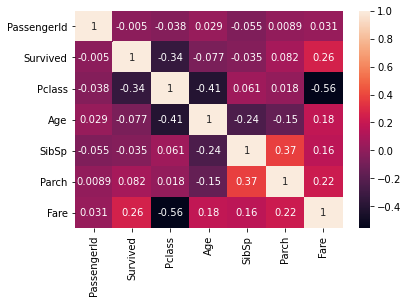

In [74]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(df2_c, annot=True)
plt.show()